In [1]:
import cv2
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

## 3-4-4

In [2]:
def myplot(img, img2=None):

    img = img.astype(np.uint8)
    im4p = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    if img2 is None:
        #     plt.subplot(121)
        plt.imshow(im4p)

    else:
        img2 = img2.astype(np.uint8)
        plt.subplot(121)
        plt.imshow(im4p)

        im4p2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
        plt.subplot(122)
        plt.imshow(im4p2)

In [11]:
def myplot4(img, img2=None, img3=None, img4=None):

    imgs = [img, img2, img3, img4]
    for idx, tmp_img in enumerate(imgs):

        if tmp_img is None:
            continue
        tmp_img = tmp_img.astype(np.uint8)
        im4p = cv2.cvtColor(tmp_img, cv2.COLOR_BGR2RGB)
        
        plt.subplot(1, 4, idx+1)
        plt.imshow(im4p)

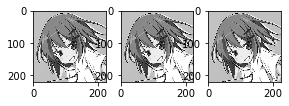

In [12]:
img = cv2.imread("sample/3-4/input.jpg")
img2 = cv2.imread("sample/3-4/input.jpg")
myplot4(img2, img, img)

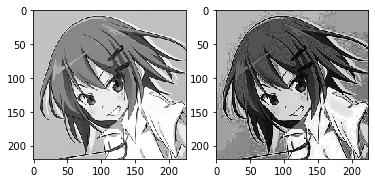

In [5]:
import cv2
import numpy as np


def main():
    img = cv2.imread("sample/3-4/input.jpg")

    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    dst2 = cv2.equalizeHist(gray)

    myplot(img, dst2)


main()

#### numpy

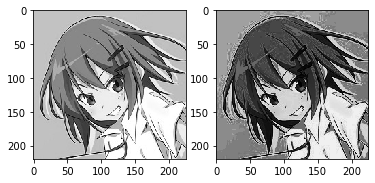

In [6]:
def equalize_hist(src):

    h, w = src.shape[0], src.shape[1]
    s = w*h

    imax = src.max()

    # ヒストグラムの算出
    hist, bins = np.histogram(src.ravel(), 256, [0, 256])

    dst = np.empty((h, w))
    
    for y in range(0,h):
        for x in range(0,w):
            dst[y][x] = np.sum(hist[0: src[y][x]]) * (imax/s)
    return dst

def main():

    img = cv2.imread("sample/3-4/input.jpg")

    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    
    dst1 = equalize_hist(gray)
    
    myplot(img, dst1)

main()

## 3-5 空間フィルタリング

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


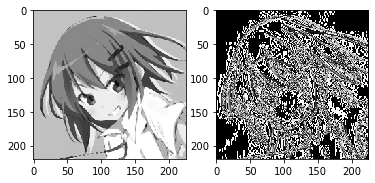

In [7]:
import cv2
import numpy as np


def main():

    gray = cv2.imread("sample/3-5/input.jpg", 0)

    # ガウシアンフィルタ処理
    gaussian = cv2.GaussianBlur(gray, ksize=(3, 3), sigmaX=1.3)

    # ラプラシアンフィルタ処理
    laplacian = cv2.Laplacian(gray, cv2.CV_32F, ksize=3)

    # メディアンフィルタ
    median = cv2.medianBlur(gray, ksize=3)
    
    # ソーベル
    sobel = cv2.Sobel(gray, cv2.CV_32F, 1,0,ksize = 3)

    myplot(gaussian, laplacian)
    myplot(median, sobel)
    
main()